# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import pandas as pd
import numpy as np
from random import choices
import matplotlib
import random

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice_ten(n): # n  number of times I want to dice
    sequence = [] # sequence is the empty list we want to fill in with values of the dicing.
    for i in range(n):
        sequence.append(random.choice(np.arange(1,7,1)))
    return pd.DataFrame(sequence) # we create a dataframe out of the random values from the dicing.

    

In [3]:
df_dice = dice_ten(10)

In [120]:
df_dice.columns = ['Results']
df_dice

,Results
0,1
1,5
2,4
3,5
4,1
5,4
6,5
7,4
8,6
9,3


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

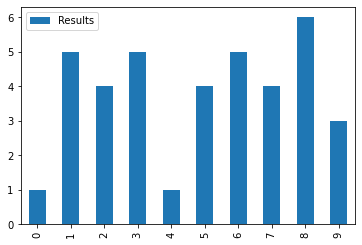

In [117]:
df_dice.plot.bar()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [70]:
list_results = list(df_dice['Results']) # we create a list with the values of the column
df1 = pd.Series(list_results).value_counts().sort_index().reset_index().reset_index(drop=True) # we create a dataset with the results and their frequency
df1.columns = ['Results', 'Frequency']
display(df1)

,Results,Frequency
0,1,2
1,3,1
2,4,3
3,5,3
4,6,1


<AxesSubplot:title={'center':'Ocurrences Dice'}, xlabel='Results'>

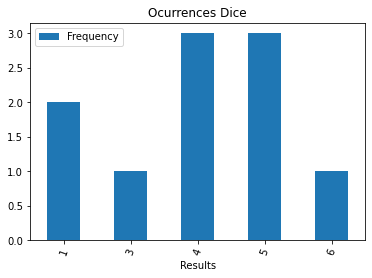

In [73]:
df1.plot.bar(x="Results", y="Frequency", rot=70, title="Ocurrences Dice")# we plot it into a bar diagram

In [121]:
"""
The difference I see is that on the first plot we get the results for every dicing round and
and on the histogram we get the occurrency of each result.
"""

'\nThe difference I see is that on the first plot we get the results for every dicing round and\nand on the histogram we get the occurrency of each result.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [39]:
def mean_col (df,values):
    get_sum = df[values].sum()
    n = len(df)
    return get_sum/n

In [40]:
mean_col(df_dice,"Results")

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
list_results = list(df_dice['Results']) # we create a list out of the column
df1 = pd.Series(list_results).value_counts().sort_index().reset_index().reset_index(drop=True) # we count the occurrences per result and put them into a df
df1.columns = ['Results', 'Frequency'] # we rename the columns
display(df1)
print("The Mean of the frequency is", mean_col2(df1,"Frequency"))

,Results,Frequency
0,1,2
1,3,1
2,4,3
3,5,3
4,6,1


The Mean of the frequency is 2.0


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [19]:
def median (df,values):
    n_num = df[values].tolist() # we pass the values of the column into a list
    n = len(df) # We get the amount of element inside that df
    n_num.sort()
  
    if n % 2 == 0: 
        median1 = n_num[n//2]
        median2 = n_num[n//2 - 1]
        median = (median1 + median2)/2 # We take the average middle of 2 elements
    else:
        median = n_num[n//2]
    return median
median(df_dice,"Results")

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [33]:
def find_quartiles(df,values): # finds the median of a sorted_list
    sorted_listed_data = df.sort_values(values)
    list_from_colum= df[values].tolist() # we pass the values of the column to a list
    middle = len(list_from_colum)//2 
    lower_q = median(sorted_listed_data[:middle],values)
    median_q = median(df,values)
    upper_q = median(sorted_listed_data[middle:],values)
    return "Q1 is:" + str(lower_q), "Q2 is:" + str(median_q), "Q3 is:" + str(upper_q)

In [34]:
find_quartiles(df_dice,'Results')

('Q1 is:3', 'Q2 is:4.0', 'Q3 is:5')

In [ ]:
list_from_colum = df_dice.sort_values("Results")
list_from_colum

In [ ]:
lower_q = df_dice["Results"].tolist().sort()
len(lower_q)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

    Unnamed: 0  roll  value
0            0     0      1
47          47    47      1
56          56    56      1
9            9     9      1
73          73    73      1
..         ...   ...    ...
17          17    17      6
11          11    11      6
24          24    24      6
21          21    21      6
99          99    99      6

[100 rows x 3 columns]


<AxesSubplot:ylabel='Frequency'>

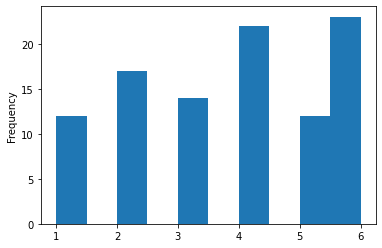

In [35]:
hundred = pd.read_csv("roll_the_dice_hundred.csv")
hundred = hundred.sort_values(by=['value'])
print(hundred.head(100))
hundred["value"].plot.hist()

In [ ]:
# The highest amount of occurrences happen on the value 6, followed by 4 and 2 on the third position.

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [36]:
hundred.head()

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1


In [41]:
mean_col(hundred,"value")

3.74

#### 3.- Now, calculate the frequency distribution.


In [44]:
list_results = list(hundred['value'])
df2 = pd.Series(list_results).value_counts().sort_index().reset_index().reset_index(drop=True)
df2.columns = ['value', 'frequency']
df2.head()

,value,frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<AxesSubplot:xlabel='value'>

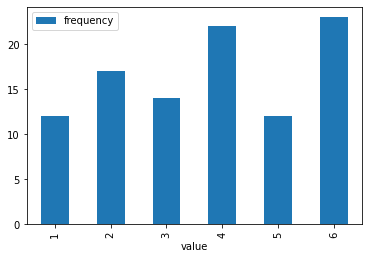

In [78]:
df2.plot.bar(x="value", y="frequency")

In [ ]:
"""
4 and 6 are the most representative results with an occurrence of more than 20 times.
The median is closer to the 4, driven up by the high number of occurencies of 4 and 6.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<AxesSubplot:title={'center':'frecuency_value'}, xlabel='value'>

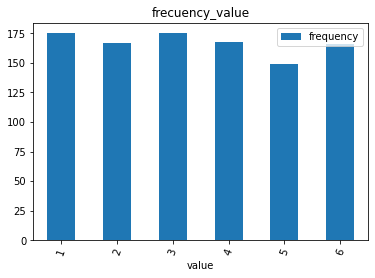

In [82]:
thousand_dice = pd.read_csv("roll_the_dice_thousand.csv") # same explanation as on the previous similar operations of other datasets
list_thousand_dice = list(thousand_dice['value'])
df3 = pd.Series(list_thousand_dice).value_counts().sort_index().reset_index().reset_index(drop=True)
df3.columns = ['value', 'frequency']
df3
df3.plot.bar(x="value", y="frequency", rot=70, title="frecuency_value")

In [ ]:
"""
I would highlight that the frecuency of results on the thousand dice df is shared more homogeneusly, by having a range of occurrences between 150 and 175 for eache value.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [86]:
ages_population = pd.read_csv("ages_population.csv")
ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


<AxesSubplot:title={'center':'frecuency_ages'}, xlabel='ages'>

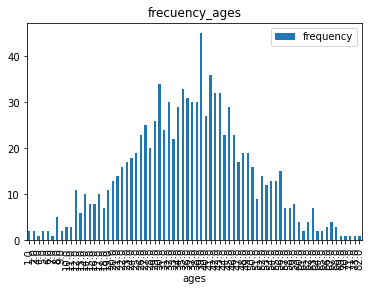

In [112]:
list_ages_population = list(ages_population['observation']) # same explanation as above
df4 = pd.Series(list_ages_population).value_counts().sort_index().reset_index().reset_index(drop=True)
df4.columns = ['ages', 'frequency']
df4
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
df4.plot.bar(x="ages", y="frequency",title="frecuency_ages")

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [98]:
display(mean_col(ages_population,"observation")) # using the formula above
display(ages_population.mean()) # using the numpy method
display(ages_population.std())

36.56

observation    36.56
dtype: float64

observation    12.8165
dtype: float64

In [ ]:
"""
Since I was not able to zoom in or read the values of the x axis I could only give a guess by looking at the data that a population
until 80 was represented and I thought about 40 as the mean.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [99]:
ages_population2 = pd.read_csv("ages_population2.csv")
ages_population2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


,ages,frequency
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


<AxesSubplot:title={'center':'frecuency_ages2'}, xlabel='ages'>

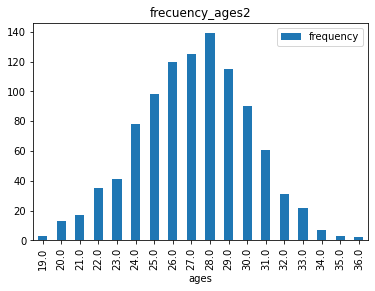

In [101]:
list_ages_population2 = list(ages_population2['observation']) # same explanation
df4 = pd.Series(list_ages_population2).value_counts().sort_index().reset_index().reset_index(drop=True)
df4.columns = ['ages', 'frequency']
display(df4)
df4.plot.bar(x="ages", y="frequency",title="frecuency_ages2")

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The shape of the plot of ages_population2 seems to be slightly be negatively skewed by the weight of values between 26 and 29
The 2nd group is more homogeneus, the sample taken contains a smaller age range of indiviuals, going from 19 to 36, instead of the 1 to 82
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [102]:
display(mean_col(ages_population2,"observation")) # using the formula above
display(ages_population2.mean()) # using the numpy method
display(ages_population2.std())

27.155

observation    27.155
dtype: float64

observation    2.969814
dtype: float64

In [ ]:
"""
I would highlight the standard deviation being smaller than on the first group (step 2).
The plot seems to have a "normal curve", by including 68% of the sample within 1 standard deviation.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [104]:
ages_population3 = pd.read_csv("ages_population3.csv")
ages_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


,ages,frequency
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1
...,...,...
70,73.0,6
71,74.0,6
72,75.0,2
73,76.0,1


<AxesSubplot:title={'center':'frecuency_ages3'}, xlabel='ages'>

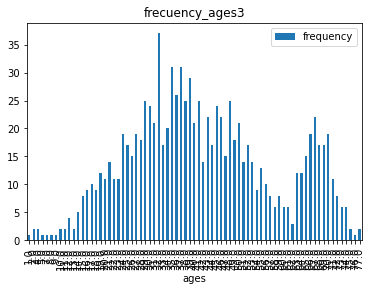

In [105]:
list_ages_population3 = list(ages_population3['observation'])
df5 = pd.Series(list_ages_population3).value_counts().sort_index().reset_index().reset_index(drop=True)
df5.columns = ['ages', 'frequency']
display(df5)
df5.plot.bar(x="ages", y="frequency",title="frecuency_ages3")

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [106]:
display(mean_col(ages_population3,"observation")) # using the formula above
display(ages_population3.mean()) # using the numpy method
display(ages_population3.std())

41.989

observation    41.989
dtype: float64

observation    16.144706
dtype: float64

In [ ]:
"""
The standard deviation seems to be driven up to a higher value due to the relatively high number of individuals on their 60s
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

('Q1 is:30.0', 'Q2 is:40.0', 'Q3 is:53.0')

<AxesSubplot:>

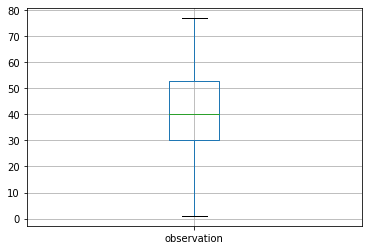

In [110]:
display(find_quartiles(ages_population3,"observation"))
ages_population3.boxplot()

In [ ]:
"""
The mean is almost 2 points larger than the mean.
Moreover we can state that the sample is relatively heterogeneus as the Q1 and Q3 spread over a range of 23 years.
There are some outliers within the first 10 and last 10 years, being the oldest group of outliers larger than the youngest ones.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [115]:
percentile60 = np.percentile(ages_population3,65)
percentile95 = np.percentile(ages_population3,95)
display(percentile60)
display(percentile95)

47.0

70.0

In [ ]:
"""
I would take the 60th and the 95th percentiles, as they are commonly used within the industry and show a value inbetween the median and the 3rd percentile.
The 95th percentile would give us almost a full picture of the sample, which would probably exclude most of the outliers.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
"""
your comments here
"""